## California Housing Prediction: A Supervised Learning Project
This notebook builds a `LinearRegression` model to predict house prices using a well-known dataset. This notebook serves as a practical introduction to the concept of **supervised learning**, a branch of machine learning where we use labeled data to train a model to make predictions. 

## Project Goal
Our primary objective is to create a regression model that can accurately predict median house value `MedHouseVal` for different districts in California. We will use **California Housing Dataset** from `sklearn` which includes various features aboyr each district, such as median income, population and the average number of rooms. 


In [11]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading
Load the California housing dataset using `fetch_california_housing` with `as_frame` set to `True` so data and target are retruned as pandas DataFrame including columns with appropriate dtypes.
- Inspect first few rows and info using `head()` and `info()` methods of pandas DataFrame.
- Check for any null or missing values.
- Set `target` to `MedHouseVal` and
- `features` to all other columns of DataFrame. 

In [12]:
#initial data inspection
ca_df = fetch_california_housing(as_frame=True).frame
ca_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
ca_df.isna().sum().sort_values(ascending=True)

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [15]:
target = 'MedHouseVal'
features = [feature for feature in ca_df.columns if target != feature]
print(features)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Exploratory Data Analysis
- Using **MatplotLib** and **Seaborn**
    - Create a correlation heatmap with a triangular mask. `corr()` method of DataFrame calculates correlation matrix for all numeric columns. `heatmap` from seaborn is used to plot this correlation matrix hiding upper triangle using `numpy.triu` funtion.
    - Create a series of scatter plots with a linear regression line, visualizing the relationship between each feature and the target variable.
    - `regplot` of `seaborn` creates scatter plot with regression line, setting `data=ca_df`, `x=feature`, and `y=target` plots the data points and displays linear regression line along with shaded confidence internavl.

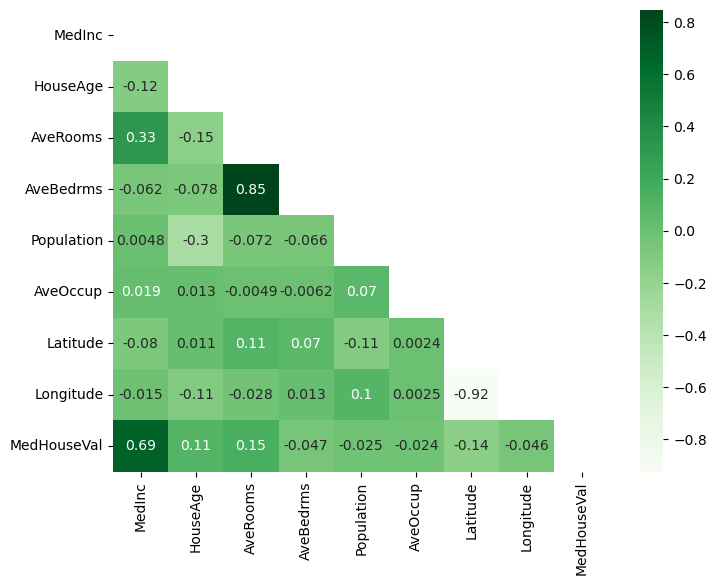

In [16]:
corr = ca_df.corr()
mask = np.triu(corr)
plt.figure(figsize=(8, 6))
sns.heatmap(ca_df.corr(), annot=True, cmap='Greens', mask=mask)
plt.show()

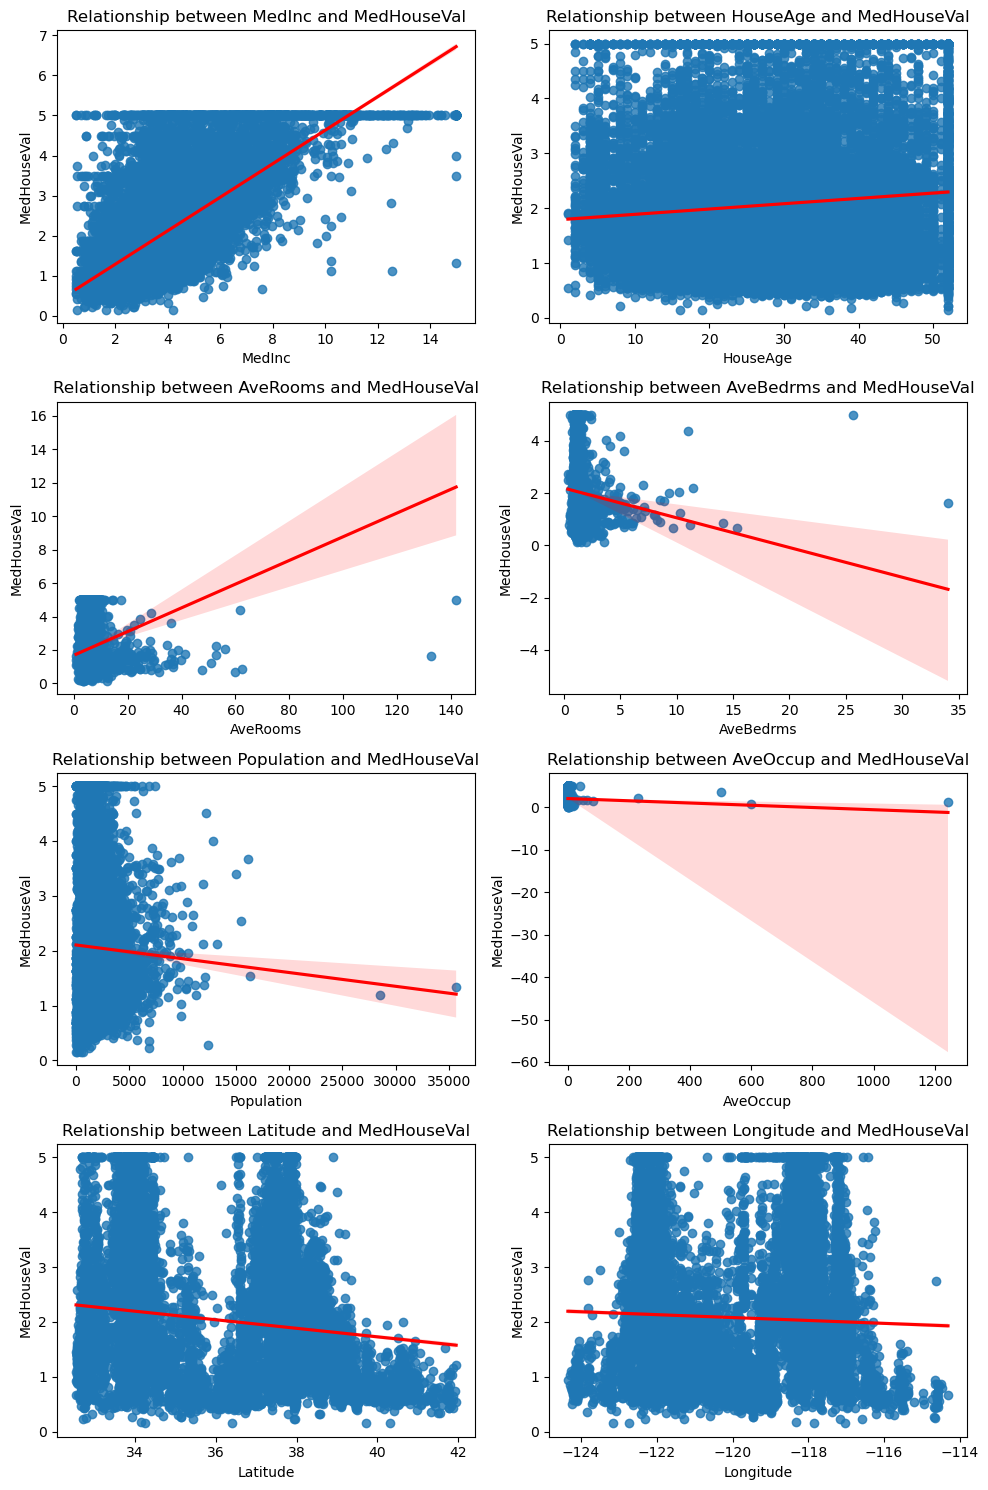

In [17]:
#Distribution of each feature
plt.figure(figsize=(10, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 2, i+1)
    sns.regplot(data=ca_df, x=feature, y=target, line_kws={'color': 'red'})
    plt.title(f'Relationship between {feature} and {target}')
plt.tight_layout()
plt.show()

### Observations from the plot.
* **Median Income (`MedInc`) vs House Value:** This plot is showing the strongest positive liner relationship. As the median income in a block group increases, the median house value tends to increase significantly. The refression line will have a clear upward slope and the data points will be clusterd relatively close to the line, indicating strong correlation.
* **Average Rooms (`AveRooms`) vs House Value:** Positive but weaker linear relationship can be ovserved here. A higher average number of rooms might correlate with a higher house value, but the relationship wont be as clean as with `MedInc`.
* **House Age (`HouseAge`) vs. House Value:** This plot shows a very weak and the relationship is likely non-linear. Older houses aren't necessarily more valuable in this dataset. The regression line might be nearly flat or have a slight downward slope, and the data points will be widely dispersed.
* **Latitude and Longitude vs. House Value:** These plots are showing a non-linear and complex relationship. Housing prices are highly dependent on location, but a simple linear plot won't capture this. You might see specific clusters of high-value homes in certain geographical regions, but the regression line itself might not tell a complete story. This suggests that the relationship between location and price is not a simple straight line.
* **Other Features (Population, AveBedrms, AveOccup):** The plots for these features are showing very weak or no clear linear relationship with house value. The regression lines are nearly flat, and the data points are heavily scattered.

**`MedInc`** appears to be most influential feature for predicting house value. This suggests that linear regression model will relay heavily on this feature.


## Data Splitting
Before training model, split the dataset into two parts: a **training set** and a **testing set**. This is a critical step in supervised learning to evaluate model's performance on unseen data and prevent **overfitting**.

* We'll use **80%** of the data for training. The model will learn the patterns and relationships from this data.
* We'll reserve the remaining **20%** for testing. After the model is trained, we'll use this data to evaluate its performance and see how well it generalizes to new examples.

We use the `train_test_split` function from scikit-learn for this task. Setting `random_state=42` ensures that the split is the same every time we run the code, which is essential for **reproducibility**.

In [18]:
# Prepare features (X) by dropping the target column from the dataframe
X = ca_df.drop(target, axis=1)
# Extract the target variable (y) from the dataframe
y = ca_df[target]
# Split the data into training and testing sets
# - 80% for training, 20% for testing
# - random_state=42 ensures reproducibility
# - shuffle=True randomizes the data before splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

## Model Training and Evaluation 🏋️‍♀️

Now that the data is split, we can train our **Linear Regression model**. The goal of the model is to learn the relationship between the features (`X_train`) and the target variable (`y_train`) to make accurate predictions.

First, we **initialize** the `LinearRegression` model. Then, we use the `.fit()` method to train the model on our training data. After training, the model is ready to make predictions. We use the `.predict()` method to generate house price predictions (`y_pred`) for our unseen test data (`X_test`).

Finally, to see how well our model performed, we calculate the **Mean Squared Error (MSE)**. This metric measures the average squared difference between our model's predictions and the actual house values from the test set. A lower MSE indicates that our model's predictions are closer to the real values, suggesting better performance.

In [19]:
# Initialize a Linear Regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate Mean Squared Error between predictions and actual values
loss = mean_squared_error(y_test, y_pred)

# Print the loss value formatted to 4 decimal places
print(f"loss: {loss:.4f}")

loss: 0.5559


## Conclusion
- Linear Regression model for predicting California housing prices has been successfully trained and evaluated.
- The model predicted a **Mean Squared Error** of **0.5559** on the test set.
- Given the target variable `MedHouseVal` is in hundred of thousands of dollars, an MSE of 0.5559 means the average squared error is about $55,590.
- This provides a baseline for the model's performance, which can be improved upon in future iterations.

## Further Steps for Improvement

- **Feature Engineering:** The exploratory data analysis showed that some features, like Latitude and Longitude, have a complex, non-linear relationship with house prices. You can create new, more informative features from these existing ones. For example, you could create interaction terms (e.g., MedInc multiplied by AveRooms) to capture more complex relationships.

- **Try More Advanced Models:** While Linear Regression is a great starting point, more complex models can often capture non-linear patterns in the data more effectively. You could try training other supervised learning models and comparing their performance. Good choices include:

    - **Decision Tree Regressor:** This model can capture non-linear relationships and is less sensitive to outliers.
    - **Random Forest Regressor:** An ensemble method that uses multiple decision trees to make predictions, often resulting in higher accuracy and better generalization.
    - **Gradient Boosting Regressor:** Another powerful ensemble method that builds trees sequentially, with each new tree correcting the errors of the previous ones.

- **Hyperparameter Tuning:** All machine learning models have hyperparameters, which are settings that are not learned from the data but are set manually. For a Decision Tree, this could be the maximum depth of the tree. For a Random Forest, it could be the number of trees. By systematically tuning these hyperparameters, you can often significantly improve model's performance.
